In [1]:
from diffusion.time_scheduler import quadratic_beta_schedule
from image_datasets.IXIdataset import IXIDataset
import torch
from torch.utils.data import DataLoader
from model.unet import Unet
from diffusion.diffusion import DiffusionModel
from torch.optim import Adam
from diffusion.sampler import sample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from diffusion.utils import *
import numpy as np

In [2]:
def name_dim_mults(dim_mults):
    name = ''
    for dim in dim_mults:
        name+=str(dim)
    return name

## Load Dataset

In [3]:
root = "./IXI-dataset-master/size64/"
dataset = IXIDataset(root, mode="train")

channels, image_size, _ = dataset[0]['T1'].shape

batch_size = 20

In [4]:
def return_loaders_disjoint(train_size):
    train_set_1, train_set_2 = train_test_split(dataset, train_size=train_size, test_size=train_size)

    train_set_1_batched = []
    for i in range(int(train_size_max/train_size)):
        train_set_1_batched.extend(train_set_1)
    train_set_1 = train_set_1_batched
    
    train_set_2_batched = []
    for i in range(int(train_size_max/train_size)):
        train_set_2_batched.extend(train_set_2)
    train_set_2 = train_set_2_batched
        
    train_1_loader = DataLoader(
        train_set_1,
        batch_size=batch_size,
        shuffle=False,
    )
    train_2_loader = DataLoader(
        train_set_2,
        batch_size=batch_size,
        shuffle=False,
    )
    
    return train_1_loader, train_2_loader

def train_network(train_loader, timesteps, image_size, channels, dim_mults):
    betas = quadratic_beta_schedule(timesteps, beta_start=0.00001, beta_end=0.01)

    model = Unet(
        dim=image_size,
        channels=channels,
        dim_mults=dim_mults
    )

    model.to(device)

    nb_param = sum(p.numel() for p in model.parameters() if p.requires_grad)

    ddpm = DiffusionModel(model, timesteps, betas, device, loss_type='huber')

    optimizer = Adam(model.parameters(), lr=3e-4)

    ddpm.train(epochs, optimizer, train_loader)
    
    return ddpm

## Benchmark diffusion model

In [5]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"

train_size_max = 400

train_sizes = [1,10,50,200] #1,10,50,100,
test_sizes = {1:1,10:10,50:50,100:100,400:40}

dim_mults = (1,2,4,)
timesteps = 1000
epochs = 200

batch_size_sampling = 10

In [6]:
# timesteps + 1 for init
noises = torch.randn((timesteps+1, batch_size_sampling, channels, image_size, image_size)).to(device)

In [7]:
train_loaders = {}
samples_train_sizes = {}

[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.03it/s]


Train Loss: 0.28162713497877123


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.81it/s]


Train Loss: 0.14221335314214228


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.13649600110948085


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.10869290791451931


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.09939798824489117


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.08863561358302832


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.0749516736716032


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.07203350029885769


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.0698068868368864


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.058747105021029714


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.059256795328110456


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.06254460345953702


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.05534846093505621


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.04681762708351016


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.05747608914971351


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.0507351279258728


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.049966118577867744


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.047006110288202764


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.04512904081493616


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.04394805496558547


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.04495365312322974


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.044418236892670396


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.037673271261155605


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.03813663776963949


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.03673489601351321


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.04231883091852069


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.03391924826428294


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.030571390595287084


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.03270399323664606


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.026147064520046115


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.022726899967528878


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.024212922248989344


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.024358973978087305


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.021270156581886114


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.015919371182098983


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.020818395679816602


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.012710619415156544


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.014342953287996351


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.011872242670506239


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.013539180252701044


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.01177486147498712


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.014544644276611507


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.011854510172270238


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.009872001514304429


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.008899319684132934


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.013662738108541817


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.008080237917602063


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.006530842650681734


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008246197772677988


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.006613467377610505


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.00967074534855783


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.006556655606254935


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007901658321497963


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.010232550685759633


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.007658718718448654


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.007241368910763412


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.005485444015357643


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.014108353812480346


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.01054687729338184


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006854465859942138


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.0047620123426895585


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007865315454546362


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.006183946196688339


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.005648687249049544


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0053032276337035


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.009291163878515363


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00443428669241257


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.009067507059080526


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.00815691564930603


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.004944808199070394


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.006304646417265758


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.010646243218798191


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.006080381787614897


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.004941907094325871


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.00891429980401881


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.005291546366061084


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.005852160305948928


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0055530989426188174


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007120810350170359


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.004399131480022333


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.006987862091045826


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00775950510869734


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.005638916534371674


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006589404976693913


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.004586728144204244


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.004273547237971798


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.005351737869204953


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.004945606359979138


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.004622760065831244


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.005825799843296409


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00454685392905958


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.005729744321433828


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.005745034449500963


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.003687190136406571


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.004447797712055035


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.004062120569869876


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.73it/s]


Train Loss: 0.0032784207360236906


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.004494912977679633


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.007853811807581223


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.005184758914401755


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.028917052916949616


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.0620241112075746


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.029095806600525975


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.015074942982755602


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.014097090438008308


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.009348778147250414


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.010010512440931051


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.008504237071610988


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.00652454977389425


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.15it/s]


Train Loss: 0.0063942151260562245


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.006328131729969755


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.007160407432820648


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004205158376134932


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.005879747361177579


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004231168190017343


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.00325657248031348


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.00840421132161282


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.005284735572058707


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.003622632162296213


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.004805465112440288


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.005263838835526257


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004020854516420513


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.003989599412307143


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.004399886904866435


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.0038472525018732997


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.0027931976917898284


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.00793734933831729


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.005434404755942523


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004066960583440959


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.004768579910160042


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.006381671951385215


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.006381199258612469


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.005811976327095181


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0038677863543853165


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.004624296037945896


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.005460840099840425


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0033252698369324206


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.002819572214502841


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0035867430618964137


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0031563260243274273


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.005079236358869821


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.0063027901982422915


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.005672473774757237


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.003469856939045712


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0026860450889216736


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.007714663256774656


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.00868341209134087


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.004724045799230225


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.00574978154618293


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0047744931653141975


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0029590474383439868


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0033363299939082936


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.002998547311290167


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0031689217285020277


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0019953331939177588


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.003710510689415969


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.002591215824941173


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.004028618655866012


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.0029108195391017943


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.004698404087685048


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.006677051493898034


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.003123774248524569


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0017626648055738769


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004429928699391894


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.002696305382414721


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.0032136406982317565


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0041012320929439735


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0029105482826707885


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.0022224418164114466


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0036351373069919645


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0037640769136487507


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0031821883516386152


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.002300990733783692


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0027859676847583614


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004064475229824893


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004456167775788345


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.0032991734173265287


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.0033228839456569403


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.006454187681083567


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.39it/s]


Train Loss: 0.004273380519589409


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.0023468995190341958


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.0036479009344475345


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.006784550531301647


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006488699818146415


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.0036792329658055676


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0038561725203180687


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.00439051617286168


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0031494074151851236


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0052853106404654685


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.003257316295639612


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.003069143726315815


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.00532022756524384


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006427178566809744


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.002566120658593718


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.0022215177479665725


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.0019766139885177836


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0032466217773617244


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.005192062372225336


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0036394747032318263


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.65it/s]


Train Loss: 0.004966488454374485
End of training!
[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.3080204870551825


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.72it/s]


Train Loss: 0.11945030521601438


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.36it/s]


Train Loss: 0.11229095086455346


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.08810435868799686


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.07984758503735065


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.0676445689983666


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.060236440040171146


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.74it/s]


Train Loss: 0.05691287741065025


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.05731641193851829


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.05321457590907812


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.0443346849642694


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.04624360976740718


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.03946885755285621


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.05013236366212368


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.04452301179990172


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.03743617665022612


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.039782304083928466


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.03614955311641097


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.036711251363158226


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.03301442367956042


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.03346815202385187


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03309951014816761


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.030414780741557478


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.025723851239308714


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.02276399089023471


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.021644005039706826


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.020993181457743048


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.016530571132898332


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.021783180069178343


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.021099198539741338


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.015565751888789236


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.011448713240679354


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00981477084569633


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007387658813968301


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0136035947361961


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.010314798401668667


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0060806340887211265


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.014409018540754914


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.012351143395062537


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.010265364893712103


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.005273762351134792


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0066997094312682744


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008412394591141492


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.010524344362784177


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.00783868907019496


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.005180651042610407


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.004824182548327371


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006351733888732269


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.005947839352302253


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.008678458037320525


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008656178077217191


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.005466776055982336


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.004319022758863866


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.005120407982030883


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007606246758950874


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006329225347144529


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.005275620805332437


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.004759957012720406


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.006211354117840529


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.005184284778079018


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.004248895158525556


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.005347764544421807


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.005059843874187208


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.005605345650110394


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.004168212349759415


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.00500254665967077


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0077792099909856915


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008853557339170948


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.005706292309332639


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.004016422972199507


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.004692823154618964


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00447112807596568


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.005365746433380991


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007211174169788137


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00504499051021412


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.004434911158750765


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0048981983680278065


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.00406565370503813


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.00518091488047503


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.0062512370641343296


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.004588606327888556


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.001863645386765711


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.0023450591397704557


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.002355131073272787


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.0057568263378925625


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.0046305622556246815


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.0053992976696463305


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.005863160686567425


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.006364599900553003


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.0052404822199605405


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.006518924614647403


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.00500660240650177


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.003990949899889529


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0038798892026534306


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.0038888139533810318


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.00410397326486418


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.30it/s]


Train Loss: 0.006150662855361588


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.003337010972609278


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.004542479605879635


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.0033595333923585715


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.0033852542750537396


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.00335630867339205


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.53it/s]


Train Loss: 0.0020857470168266445


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0017479459871537983


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0029874283529352395


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.0029447147768223657


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.005568502761889249


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.004191274719778449


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.004777084878878668


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.004408398238592781


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.53it/s]


Train Loss: 0.003113154519814998


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.002351106479181908


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.003861495184537489


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.004056209269037936


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.0049336611613398414


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.003412380964437034


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0034064310893882066


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.002728295448468998


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0034739334194455298


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.00735097941942513


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.010173998819664121


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.005345730431145057


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.002970831948914565


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.0038242619193624705


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.0029767167259706186


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.0025579147491953335


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.005007512247539125


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.003076349286129698


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.002852998841262888


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.003863384004216641


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.006294165755389258


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.003887801390374079


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.003079150928533636


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0022168613300891592


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0019659960700664668


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.004021469512372278


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.004214041923114564


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.00963110692682676


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.005023059746599756


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.78it/s]


Train Loss: 0.00462923025188502


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.0025470838707406076


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.0038248507218668236


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.0028174321341793984


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.0032405343488790097


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.78it/s]


Train Loss: 0.0043585319974226875


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.30it/s]


Train Loss: 0.003633573604747653


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0021767899219412357


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.00206380762392655


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.003297450309037231


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.002980293324799277


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.0026170384880970232


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.005821161138010211


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.003236713129444979


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.0034066374646499753


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.004242732597049326


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.00462731970474124


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.002726791326131206


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.0028658572031417862


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.0034418448092765177


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.002916992036625743


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.0026882661899435335


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.002462279825704172


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.002840176786412485


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.004240892489906401


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.00565400596242398


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.0031114524841541424


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.0049020691687474026


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.003968339526909404


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.002219923412485514


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.003645366987620946


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.003628872736589983


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.0019670352732646277


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.0014239415744668805


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.0025965979002648965


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.0026931445638183503


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.003009043040219694


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.002879691665293649


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0015728666607174092


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.002055935485986993


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0022792711650254207


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.005173242322052829


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.003986645501572639


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.0029752267146250233


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.00204587753105443


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00232597463473212


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.0026458746011485345


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0026989308404154143


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.0015740856018965133


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.0014147534930089023


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.004318255590624176


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0031269798608263956


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.0021057083140476607


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.0018343298805120866


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.0023727701904135757


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.0033665638038655743


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.0034474565589334817


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.021942305844277143


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.009876234747935086


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.004178886237787083


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.003885700978571549
End of training!
1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.53it/s]


1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.69it/s]


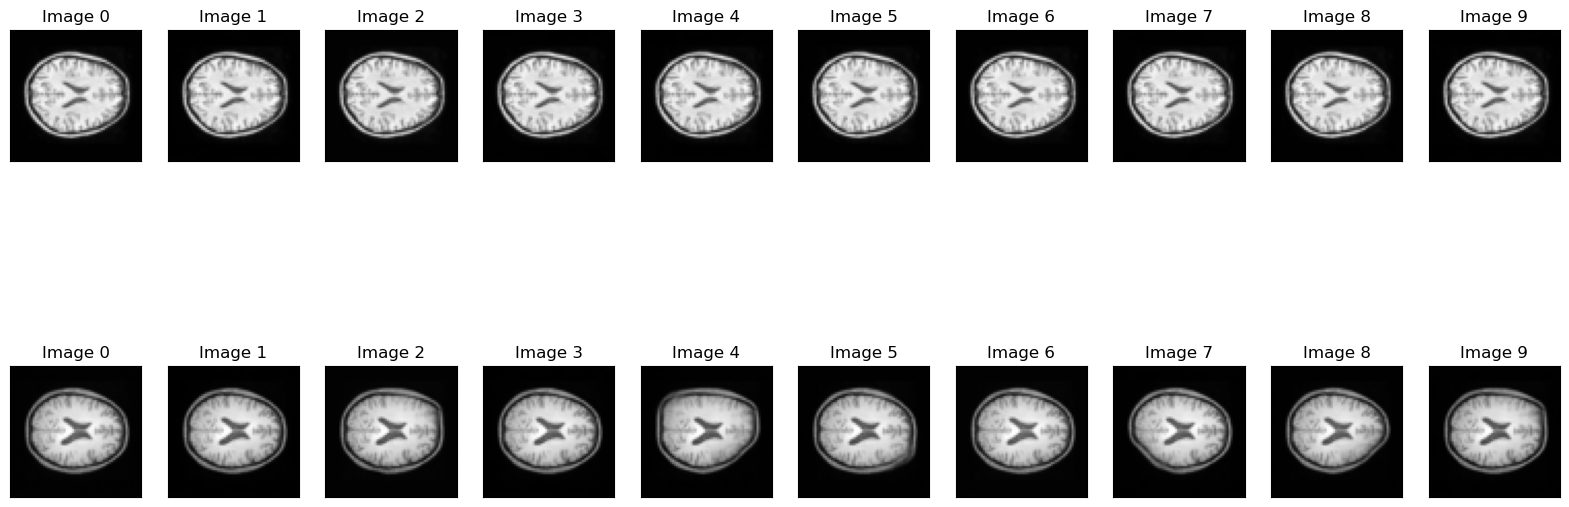

[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.2997065901756287


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.14377120099961757


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.12678735107183456


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.1087359707802534


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.08831817582249642


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.0863863255828619


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.0745031883008778


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.061100535281002524


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.07609833311289549


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.06771630719304085


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.057516081258654594


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.06105453772470355


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.05625948505476117


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.0553825962357223


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.05995536670088768


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.06742766369134187


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.057081928662955764


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.0471734301187098


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.058345355466008185


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.06381443627178669


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.05381946125999093


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.05355578800663352


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.04752348652109504


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.05073163788765669


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.04247232880443334


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.04701130045577884


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.04693537782877684


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.0418181037530303


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.04469742439687252


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.044634963385760784


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.046735444013029336


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.03757347408682108


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.04617817783728242


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.04289537370204925


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.03974486105144024


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.03608962222933769


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.042878448776900766


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.04177735084667802


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.038441247493028644


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.03791092485189438


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.036723716743290426


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.03497584629803896


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.03576506832614541


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.03577139787375927


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.03480477249249816


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.03885246468707919


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.03877590922638774


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.033384318370372056


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.034895177278667686


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.033570128679275515


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.031634110119193794


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.034367486648261544


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.033758743572980164


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.030218642484396697


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.030081965727731586


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.026507165003567933


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.027450140658766033


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.029186461865901948


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.027573952404782175


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.026287304889410733


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.02613554005511105


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.02519354736432433


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.029662062227725983


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.024071134626865387


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02103817882016301


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.022457104828208684


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0207273175008595


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02137239295989275


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.01981072067283094


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.02107714363373816


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.020357263181358574


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.017230588616803287


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.01565426744055003


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.01911948185879737


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.016341165499761702


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.022242365987040102


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.016288646962493658


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.01880080739501864


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.014097689790651203


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.01481804185314104


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.017832225235179067


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.016305586090311408


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.01230356611777097


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.014755929238162935


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.01242337494622916


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.012690108874812723


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.013109215651638806


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.013374657300300897


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.014050134539138526


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.01380319930613041


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.011049316357821226


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.009677128016483039


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.010665885847993195


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.012451336544472724


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01141981731634587


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.011369130620732904


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.008841739431954921


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.011640775832347572


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.010245264170225709


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.007860877702478319


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.008295979606918991


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.010911051742732525


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.01089977634837851


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.011861859017517417


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.011443513236008585


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.008684230432845653


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.010523218219168485


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.009109787188936024


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00732665965333581


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.01029629613040015


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.012618283333722502


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.009874545654747635


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.007966210402082652


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.012552540039177985


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.010159622156061232


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.010654992412310094


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.011327186808921396


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.011129775864537806


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.009615515533369035


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.008090466458816082


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008709549636114389


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.008201948704663665


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.011181159038096666


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.009217194514349103


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.008072566916234791


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006460079253884032


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.009439649386331439


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.007163178262999281


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.008630395424552262


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.008008834160864352


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.006652361119631678


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.009973561874357984


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.00821579813491553


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.006874946446623653


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.00931856973329559


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.008249075472122058


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.008762014715466648


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.007537768909242004


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.007585090456996113


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.007275554310763255


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.007775860844412818


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.008162822516169399


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.011478389205876738


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.009746755147352815


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.005681812914554029


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.006493983225664124


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.007656041136942804


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.006513061805162579


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.008454148418968544


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.006112859665881843


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.58it/s]


Train Loss: 0.008030985511140898


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.0057541326736100015


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.005780480016255751


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.007283357169944793


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.008153299870900809


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.007883178623160347


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.005294865928590298


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.008053752320120112


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.008589376125019043


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.006966503243893385


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.00823443226981908


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.74it/s]


Train Loss: 0.007218565174844116


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.55it/s]


Train Loss: 0.006579769036034122


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.00798405873356387


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.008557790267514066


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.00902539782691747


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.008059973223134875


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.007480001414660364


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.008044041716493667


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.006613130710320547


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.008524349960498511


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.006264733296120539


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.006021863920614124


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.55it/s]


Train Loss: 0.006499212922062725


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.005201648111687973


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.006187731097452342


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.007207401876803488


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.00737788655096665


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.007086663885274902


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.006615911849075928


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.007331832451745868


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.007214998593553901


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.00547626587213017


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.006378393794875592


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.008102126978337764


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.0072874832025263455


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.007182394666597247


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.009934872342273592


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.0059376458055339755


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.005842610634863377


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.006190414587035775


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.006312625558348372


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.008168650208972394


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.00650553188752383


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.005661294833407738


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.007525844144402072


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.007768624217715114


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.006046877166954801


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.0036689176864456385


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.005985019129002467
End of training!
[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.3008769229054451


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.13885831832885742


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.11251504383981228


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.09804239552468061


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.0886918680742383


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.07061617076396942


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.06536897653713822


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.07890943605452776


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.057924458477646115


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.06346910148859024


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.05116692641749978


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.06924545718356967


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.057224056776613


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.05441546589136124


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.05045200539752841


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.58it/s]


Train Loss: 0.04804720059037208


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.04477875512093306


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.05107993930578232


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.04673705138266086


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.05236127879470587


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.045491939317435025


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.046909750998020174


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.044751379266381265


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.039880930166691544


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.04335755361244083


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.04211569903418422


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.0354545502923429


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.041997011937201026


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.03825681759044528


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.037305910047143696


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.30it/s]


Train Loss: 0.03905183468014002


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.04296225914731622


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.041979671362787484


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.035607875883579256


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03817291744053364


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.0356523422524333


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.03660006523132324


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03317319368943572


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.036849735165014864


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.036766962893307206


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.035405358439311384


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03376445984467864


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03523252410814166


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.029956654319539665


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.03553611566312611


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.030684736417606474


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.028748273523524402


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.0268019400537014


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.030395041173323988


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03115904554724693


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03344435687176883


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.030797014525160194


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.0321896948851645


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.028133499994874002


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.024960072431713342


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.024177767196670176


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.023091914225369693


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.02562168105505407


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.023366507096216082


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.021614012541249394


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.02022272301837802


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.01989788035862148


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.020637420751154423


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02688345992937684


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.021640612138435246


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.019038485107012094


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.017949029919691384


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01657398003153503


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.019517433061264456


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.01691372343339026


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.022413473087362946


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.01850558796431869


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.013829502370208501


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.015503040724433958


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.014643698092550039


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.017853636853396894


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.013877214293461292


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.012888530571945011


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.015018834103830158


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.015590257523581386


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.52it/s]


Train Loss: 0.015456202952191234


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.016063780151307584


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.01333139487542212


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.013538929144851863


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.014558190945535898


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.014839411783032119


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.012562732468359173


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.013489953218959272


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.33it/s]


Train Loss: 0.014430952968541532


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.42it/s]


Train Loss: 0.012220870214514434


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.014219909673556685


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.39it/s]


Train Loss: 0.014868446346372365


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.012230021646246314


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.37it/s]


Train Loss: 0.01079237146768719


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.012070668512023985


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.010459616885054857


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.012415566435083746


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.012074445781763643


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.48it/s]


Train Loss: 0.012028813385404647


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.011045095871668308


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.010317696095444261


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.009471315192058682


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.81it/s]


Train Loss: 0.013865422969684005


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.010675241774879395


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.011761756637133658


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.009870115021476522


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.008409405150450766


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.008979293867014349


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.72it/s]


Train Loss: 0.010809031000826507


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.012649633176624774


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.66it/s]


Train Loss: 0.009993177303113044


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.42it/s]


Train Loss: 0.008482360548805445


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.011129213101230561


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.010306297871284186


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.0066214174148626626


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.007470732380170375


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.007884169172029942


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.010047053452581167


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.55it/s]


Train Loss: 0.010911448259139433


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.52it/s]


Train Loss: 0.010924766620155424


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.010282553103752434


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.008097307023126632


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.007147470791824162


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.008555797801818699


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.007777181174606085


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.57it/s]


Train Loss: 0.007104803156107664


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.008407511003315448


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.009686802641954272


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.00924173730891198


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.007332329638302326


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.008770833152811974


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.006893309322185815


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.00797394997207448


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.56it/s]


Train Loss: 0.007748299196828156


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.006882046774262562


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.006986815389245749


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.58it/s]


Train Loss: 0.007101539487484843


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.007347751717315987


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.007929169363342226


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.0066156731627415866


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.007745380705455318


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.008636917470721529


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.009629063354805113


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.00816551233874634


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.008094962284667417


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.007222316059051081


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.006307982088765129


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.006361478543840349


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.009176037809811532


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.007797863753512502


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.00846108102123253


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.81it/s]


Train Loss: 0.006367944652447477


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.006620404543355107


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.0069319404370617125


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00689815835794434


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.005691035708878189


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.007997193408664316


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.0069606297882273795


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006703710969304666


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00702393248793669


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.007301364227896556


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006902043602894992


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.009738856006879359


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.0050910705875139685


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.010200449585681781


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.007005409733392298


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.007652629050426185


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.008628794120159


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.007000230753328651


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.008366895571816713


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.008210955606773495


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.00765649817767553


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.005559064506087452


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.0074487921549007295


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.004658903006929904


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006253956689033657


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.007054853363661096


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.006919601664412767


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.0051494985062163325


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.00504449512809515


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.005198096091044135


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006653713941341266


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.007729931198991835


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.007846769283059985


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0071524110389873385


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.006816270877607167


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.008853853034088388


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.007240457326406613


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.007707107678288594


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.0077068047830834985


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.007502361992374062


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.00568965298589319


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.006117911241017282


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.007161913346499205


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.006739872682373971


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.00544286678195931


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.06it/s]


Train Loss: 0.0034367297048447654


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.006206742796348408


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.005984824779443443


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.006047976203262806
End of training!
1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.75it/s]


1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.34it/s]


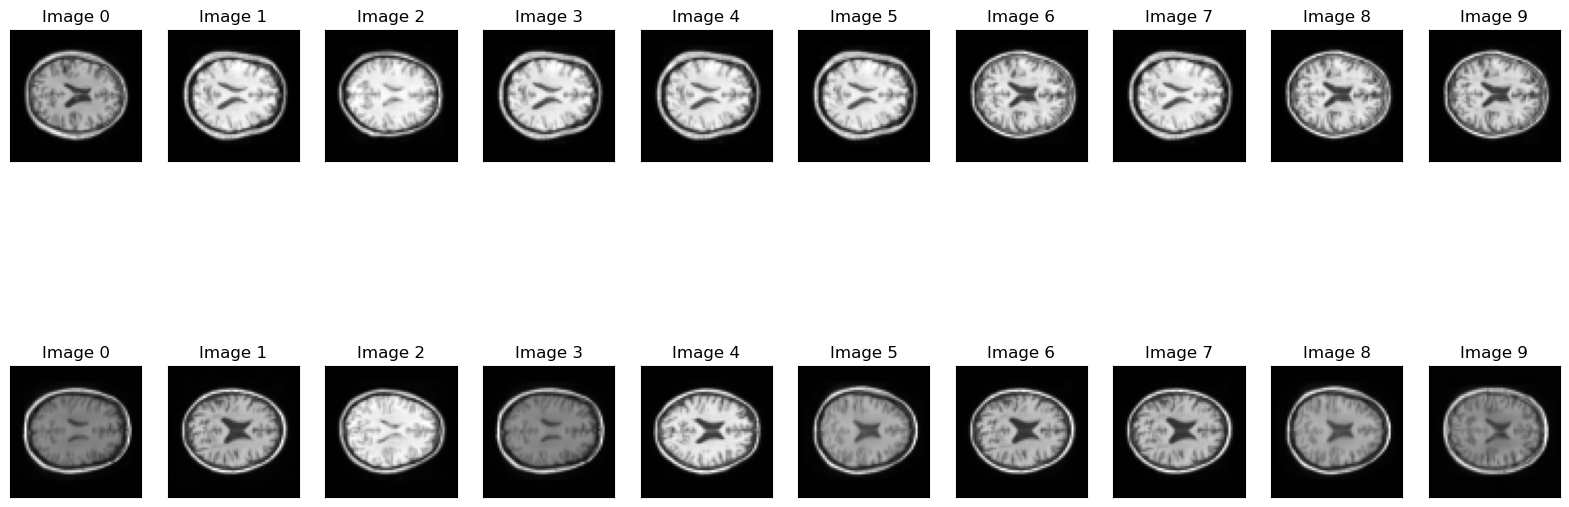

[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.76it/s]


Train Loss: 0.2719467435032129


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.13991809077560902


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.75it/s]


Train Loss: 0.12359752245247364


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.10838393326848746


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.10018031224608422


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.78it/s]


Train Loss: 0.07715671490877866


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.08055135682225227


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.07703463807702064


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.06729668546468019


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.0614740239456296


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.06198371984064579


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.06983828954398633


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.06276548076421022


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.05711622964590788


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.05766715817153454


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.053569412883371116


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.05448329672217369


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.05173466317355633


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.04694917714223266


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.04811839424073696


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.81it/s]


Train Loss: 0.04753849962726235


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.04329901607707143


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.63it/s]


Train Loss: 0.048701148573309185


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.04781334176659584


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.04548566127195954


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.04856728781014681


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.76it/s]


Train Loss: 0.03956280527636409


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.04516097167506814


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.05017481558024883


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.04339944124221802


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.041229820158332584


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.03800647873431444


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.04144624350592494


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.78it/s]


Train Loss: 0.037490039318799975


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.03980432446114719


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.03996996581554413


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.03893422381952405


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.038339431025087835


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.038975123036652806


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.03618828719481826


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.035984027991071345


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.036035179253667594


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.039438880421221255


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.0354246137663722


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.036876709945499894


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.03493026066571474


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.034011964686214924


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.03426547525450587


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.03499572016298771


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.03528285436332226


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.0311889979057014


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.82it/s]


Train Loss: 0.03090452877804637


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.03332006027922034


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.035510527854785326


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.032886704755946995


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.03192789349704981


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.03394290097057819


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03468139562755823


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.03554792450740933


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.03530321391299367


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.03388445004820824


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.03312483849003911


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.84it/s]


Train Loss: 0.027983168372884393


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.03483347371220589


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03104129796847701


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.031029408564791083


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.03126415489241481


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.030669010384008287


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03370418846607208


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03074014401063323


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.030332250474020838


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03412980451248586


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.028739529196172953


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03022943385876715


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.036518292501568794


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.032392102759331465


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03217242304235697


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.02933858074247837


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03028607917949557


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.03185666259378195


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.031365412287414074


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.031262159394100306


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.029403392085805537


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.031012762524187564


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.027996807498857378


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.029015450086444617


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.029499267041683198


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.031994092371314765


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.03091504513286054


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.031073352927342056


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.028700817236676814


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.026723363110795616


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.027118288120254873


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.029289305536076428


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.027655199402943254


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.025483447732403873


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02682371544651687


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.027577947126701474


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.02695711744017899


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.15it/s]


Train Loss: 0.030441186344251036


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.87it/s]


Train Loss: 0.030018463591113688


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.029724357556551693


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.028449162980541585


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.026194399502128363


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.02812984106130898


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.02574432184919715


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.025183085072785615


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.024634949536994098


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.025679518980905414


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.0272154891397804


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.02263201684691012


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Train Loss: 0.026265785470604895


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.35it/s]


Train Loss: 0.027316605579108


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.02327946461737156


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.02528372323140502


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.027279840782284737


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.027113236580044033


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.0290902956854552


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.90it/s]


Train Loss: 0.023816159600391983


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.025694995326921342


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.026031991094350816


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.022547029564157127


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.23it/s]


Train Loss: 0.02403607773594558


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.53it/s]


Train Loss: 0.02424449510872364


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.50it/s]


Train Loss: 0.028296673204749823


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.53it/s]


Train Loss: 0.022463932121172547


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.64it/s]


Train Loss: 0.02509346972219646


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.021834291657432912


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.68it/s]


Train Loss: 0.022449105512350798


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.65it/s]


Train Loss: 0.02057678538840264


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.023237392026931047


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.02214725026860833


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.02206850554794073


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.71it/s]


Train Loss: 0.023162077623419465


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.021195186814293266


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.51it/s]


Train Loss: 0.02007499076426029


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.020046440372243523


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.69it/s]


Train Loss: 0.01950932419858873


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.02138657132163644


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.017653018655255436


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.02191930650733411


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.022737917955964804


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.73it/s]


Train Loss: 0.021576366154477


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.70it/s]


Train Loss: 0.02306615822017193


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.73it/s]


Train Loss: 0.020151811186224222


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.67it/s]


Train Loss: 0.01808677993249148


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.45it/s]


Train Loss: 0.01533801043406129


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01794295650906861


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.01957358673680574


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.020621481188572943


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.019213243597187103


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.017584621557034552


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.018381466390565038


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.016153382533229888


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.016405063960701228


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.01697195414453745


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.016987738804891704


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.88it/s]


Train Loss: 0.017644234583713114


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.01831720764748752


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.80it/s]


Train Loss: 0.017782794311642647


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.96it/s]


Train Loss: 0.016534864576533435


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.017692792974412442


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.83it/s]


Train Loss: 0.016621513641439378


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.017065976443700493


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.85it/s]


Train Loss: 0.01661011390388012


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.79it/s]


Train Loss: 0.016810703650116922


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.92it/s]


Train Loss: 0.015718651679344477


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.015318688796833157


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.015258530480787158


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.017773430445231497


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.015497351647354662


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.013165719364769757


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01259234306635335


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01875382368452847


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.01357266705017537


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.014800219587050379


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01519698635675013


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.91it/s]


Train Loss: 0.015520630939863621


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.01338468287140131


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.013772051502019166


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.011860653548501432


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.01547686317935586


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.01213111171964556


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.01707834154367447


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.014192065573297441


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.013259617937728762


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.014340778347104788


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.016026276047341526


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.93it/s]


Train Loss: 0.013116587977856397


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.013591949827969074


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.014618455548770726


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.014818107429891824


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.012106211250647902


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.014514561416581273


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.013352271914482117


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.011601586034521461


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.011699829425197095


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.011140491371043027


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.009462982136756181


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.95it/s]


Train Loss: 0.01417521657422185
End of training!
[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.24660807102918625


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.15006132684648038


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.1303403727710247


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.1084047194570303


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.09084248766303063


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.07325411308556795


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.06364956106990576


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.06383029241114854


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.06961688492447138


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.07018791465088725


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.06155772358179092


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.06740205399692059


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.05909709632396698


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.06207845937460661


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.06294349767267704


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.05747247701510787


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.061170753464102744


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.052580419834703206


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.052044487278908494


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.05074869487434626


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.04527169084176421


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.045655157417058945


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.05065464116632938


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.044092110358178616


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.046412212494760754


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.041194227524101734


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.04612219780683517


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.037880311347544195


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.04124599806964398


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.04063849505037069


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.04150651441887021


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.039616206753998996


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03862081468105316


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.039895742665976286


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.036232376703992486


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.044176596123725174


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.042066204268485306


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


Train Loss: 0.036314716842025516


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.03388361167162657


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.0371684948913753


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.63it/s]


Train Loss: 0.03874114993959665


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


Train Loss: 0.03806495890021324


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.035195677634328605


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.62it/s]


Train Loss: 0.03949187025427818


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.60it/s]


Train Loss: 0.03324299249798059


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.0338265348225832


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.01it/s]


Train Loss: 0.03658438199199736


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03425387321040034


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.05it/s]


Train Loss: 0.03581033842638135


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.89it/s]


Train Loss: 0.03628397164866328


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.036146695353090764


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.037914758734405044


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.032090152986347674


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.03it/s]


Train Loss: 0.033863634988665584


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.032746607717126605


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03421353632584214


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.03635666938498616


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.97it/s]


Train Loss: 0.03222082844004035


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.030387344397604467


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03404513997957111


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03158605480566621


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.030138935474678875


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.02it/s]


Train Loss: 0.03702605664730072


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.04it/s]


Train Loss: 0.031250243075191975


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.03164320876821876


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.03292105039581657


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.99it/s]


Train Loss: 0.03205687757581473


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.03362546507269144


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.03126105722039938


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.64it/s]


Train Loss: 0.032191651640459895


Epoch 70: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.034495956357568504


Epoch 71: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.029919022135436533


Epoch 72: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.02922454960644245


Epoch 73: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.029493388859555124


Epoch 74: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03147795340046287


Epoch 75: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.030950715113431216


Epoch 76: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.03492947020567953


Epoch 77: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03065552026964724


Epoch 78: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.02998711639083922


Epoch 79: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03002660470083356


Epoch 80: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.026207365095615387


Epoch 81: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.02942873970605433


Epoch 82: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.028701618686318396


Epoch 83: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.030757253104820848


Epoch 84: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.032026639115065335


Epoch 85: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.03042541746981442


Epoch 86: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.026406153244897722


Epoch 87: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.026910848915576935


Epoch 88: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.031006495701149106


Epoch 89: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.030281332088634372


Epoch 90: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.030170807894319297


Epoch 91: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.03254962749779224


Epoch 92: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.02741035772487521


Epoch 93: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.026271729823201896


Epoch 94: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.027375412872061133


Epoch 95: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.0282709245570004


Epoch 96: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.026617317600175737


Epoch 97: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.026513456553220748


Epoch 98: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.02324146484024823


Epoch 99: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.023770581372082232


Epoch 100: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.0282678269315511


Epoch 101: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.025434314832091333


Epoch 102: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.02761109038256109


Epoch 103: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.021349459886550903


Epoch 104: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.028379043214954436


Epoch 105: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.026114802714437245


Epoch 106: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.023341608932241797


Epoch 107: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.64it/s]


Train Loss: 0.025633222050964834


Epoch 108: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.023645214922726154


Epoch 109: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.022354546748101712


Epoch 110: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.021804872946813703


Epoch 111: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.0221425527241081


Epoch 112: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.02316291183233261


Epoch 113: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.021780704706907274


Epoch 114: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.026224405318498612


Epoch 115: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.017563367262482643


Epoch 116: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.01934411167167127


Epoch 117: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.025161234335973857


Epoch 118: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.02141933245584369


Epoch 119: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.01845458848401904


Epoch 120: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.02236668043769896


Epoch 121: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.021787712723016738


Epoch 122: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.024011939484626054


Epoch 123: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.02097199799027294


Epoch 124: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.020597445080056787


Epoch 125: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.020909979613497852


Epoch 126: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.01965958527289331


Epoch 127: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.016456250008195637


Epoch 128: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.015953127411194146


Epoch 129: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.02085261067841202


Epoch 130: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.016080569359473884


Epoch 131: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.019387756008654833


Epoch 132: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.018259114027023314


Epoch 133: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.02083238083869219


Epoch 134: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.017090804502367975


Epoch 135: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.01598012843169272


Epoch 136: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.018211366352625193


Epoch 137: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.019955852767452598


Epoch 138: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.01862878941465169


Epoch 139: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.021949815144762398


Epoch 140: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.019723343360237778


Epoch 141: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.021458372939378023


Epoch 142: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.01792089962400496


Epoch 143: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.0159714643843472


Epoch 144: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.00it/s]


Train Loss: 0.016155661642551424


Epoch 145: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.17it/s]


Train Loss: 0.016424190392717718


Epoch 146: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.86it/s]


Train Loss: 0.016937743965536357


Epoch 147: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.01753214029595256


Epoch 148: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.019353276886977255


Epoch 149: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.017046582861803473


Epoch 150: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.017753139277920126


Epoch 151: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.01832253604661673


Epoch 152: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.015729677584022283


Epoch 153: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.015236041112802922


Epoch 154: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.016891836631111802


Epoch 155: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.013775483169592918


Epoch 156: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.017052818229421972


Epoch 157: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.012951527279801667


Epoch 158: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.015139275952242315


Epoch 159: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.015918069309554993


Epoch 160: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.01565020754933357


Epoch 161: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.014383461722172797


Epoch 162: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.016753119928762317


Epoch 163: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.01163428786676377


Epoch 164: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.014139952324330806


Epoch 165: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.014466995000839233


Epoch 166: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.014157070079818368


Epoch 167: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.010996116138994694


Epoch 168: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.012922347756102681


Epoch 169: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.014094254770316183


Epoch 170: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.01696418065112084


Epoch 171: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.01311292031314224


Epoch 172: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.013797823071945459


Epoch 173: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.015713133686222135


Epoch 174: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.014187439461238682


Epoch 175: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.016212253645062447


Epoch 176: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.015158599289134145


Epoch 177: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.014679622510448099


Epoch 178: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.73it/s]


Train Loss: 0.010126038768794388


Epoch 179: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.012614420498721302


Epoch 180: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.011797410692088306


Epoch 181: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.011260419373866171


Epoch 182: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.014997314312495291


Epoch 183: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.014374714833684266


Epoch 184: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.01200292466674


Epoch 185: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.011255707871168853


Epoch 186: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.014929501758888363


Epoch 187: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.014090737118385733


Epoch 188: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.013713914784602821


Epoch 189: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.014219788485206664


Epoch 190: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.01436748516280204


Epoch 191: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.01329528815113008


Epoch 192: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.015109240449965


Epoch 193: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.01328207142651081


Epoch 194: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.013674059836193918


Epoch 195: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.01199629893526435


Epoch 196: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.010550634621176868


Epoch 197: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.011890415288507938


Epoch 198: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.71it/s]


Train Loss: 0.010532113560475408


Epoch 199: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.011139914847444744
End of training!
1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.18it/s]


1000


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.24it/s]


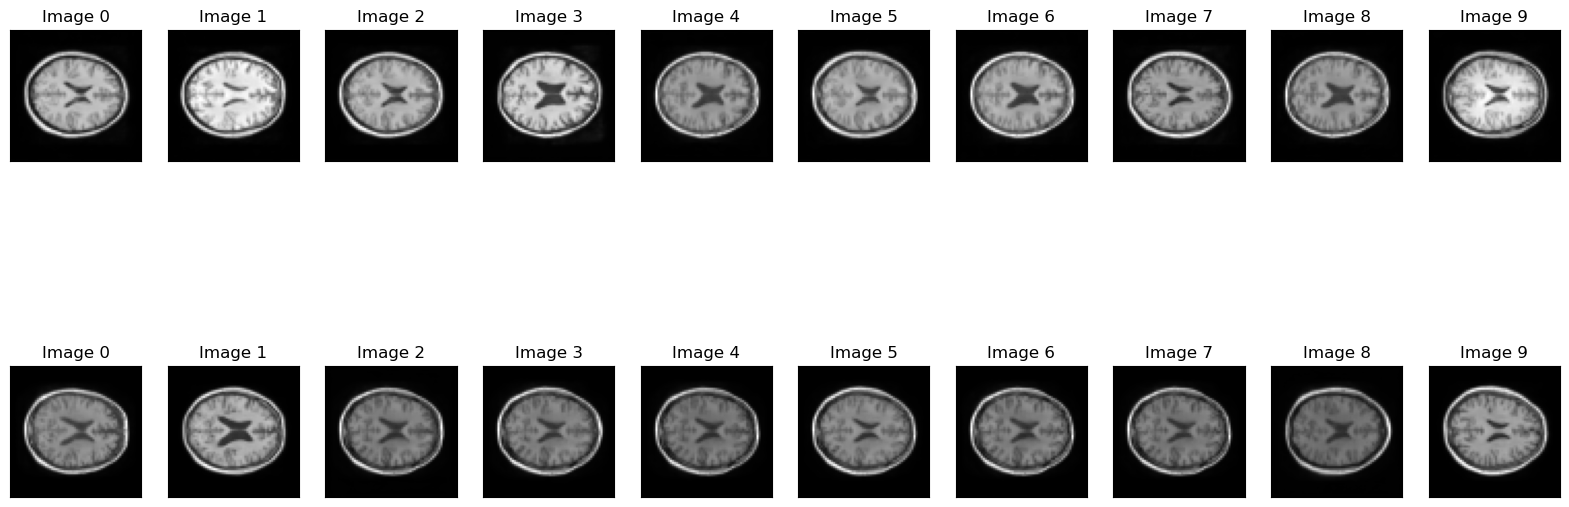

[(64, 64), (64, 128), (128, 256)]


Epoch 0: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.274852554500103


Epoch 1: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.72it/s]


Train Loss: 0.13976842910051346


Epoch 2: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.12074752487242221


Epoch 3: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.10265505816787482


Epoch 4: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.0801113087683916


Epoch 5: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.60it/s]


Train Loss: 0.08264960069209337


Epoch 6: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.08075664229691029


Epoch 7: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.07534734103828669


Epoch 8: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.11it/s]


Train Loss: 0.07170303910970688


Epoch 9: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.06403144542127848


Epoch 10: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.07it/s]


Train Loss: 0.05978219620883465


Epoch 11: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.05705889761447906


Epoch 12: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.62it/s]


Train Loss: 0.06320790834724903


Epoch 13: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.77it/s]


Train Loss: 0.052038131188601254


Epoch 14: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.05272347619757056


Epoch 15: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.98it/s]


Train Loss: 0.051844184007495644


Epoch 16: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.053802959807217124


Epoch 17: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


Train Loss: 0.04868868384510279


Epoch 18: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.11it/s]


Train Loss: 0.049424444977194074


Epoch 19: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.22it/s]


Train Loss: 0.04573253476992249


Epoch 20: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.04558794256299734


Epoch 21: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.046524985879659655


Epoch 22: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.64it/s]


Train Loss: 0.0448262476362288


Epoch 23: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.04234609939157963


Epoch 24: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.64it/s]


Train Loss: 0.04917829390615225


Epoch 25: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.04407087080180645


Epoch 26: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.04602276850491762


Epoch 27: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.61it/s]


Train Loss: 0.0404328971169889


Epoch 28: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.039054545713588594


Epoch 29: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.042158079147338864


Epoch 30: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.65it/s]


Train Loss: 0.04041558504104614


Epoch 31: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.13it/s]


Train Loss: 0.04107795972377062


Epoch 32: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.08it/s]


Train Loss: 0.043011076468974355


Epoch 33: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.10it/s]


Train Loss: 0.044187610130757095


Epoch 34: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.18it/s]


Train Loss: 0.04130847556516528


Epoch 35: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.47it/s]


Train Loss: 0.04165003541857004


Epoch 36: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.48it/s]


Train Loss: 0.03831857368350029


Epoch 37: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.94it/s]


Train Loss: 0.04039577813819051


Epoch 38: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03878777045756578


Epoch 39: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.0351555629633367


Epoch 40: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03768863407894969


Epoch 41: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.03520832778885961


Epoch 42: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.03718335796147585


Epoch 43: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.030618814704939722


Epoch 44: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03877113559283316


Epoch 45: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03822475736960769


Epoch 46: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.04012383734807372


Epoch 47: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03482499998062849


Epoch 48: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03652167692780495


Epoch 49: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.032220717426389454


Epoch 50: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.032306826952844855


Epoch 51: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03760615205392241


Epoch 52: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.03730403454974294


Epoch 53: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.03775532804429531


Epoch 54: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.0343730800319463


Epoch 55: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.032723284186795355


Epoch 56: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.64it/s]


Train Loss: 0.03189075621776283


Epoch 57: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.03882107837125659


Epoch 58: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03069388079456985


Epoch 59: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.034317746758461


Epoch 60: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03407307863235474


Epoch 61: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.033965568011626604


Epoch 62: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.70it/s]


Train Loss: 0.034192761965096


Epoch 63: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.030981109105050565


Epoch 64: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.68it/s]


Train Loss: 0.03781998809427023


Epoch 65: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.59it/s]


Train Loss: 0.03200976839289069


Epoch 66: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.67it/s]


Train Loss: 0.0354006988927722


Epoch 67: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.63it/s]


Train Loss: 0.032287667877972125


Epoch 68: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.66it/s]


Train Loss: 0.031644131802022454


Epoch 69: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.69it/s]


Train Loss: 0.032915588654577735


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.73it/s]


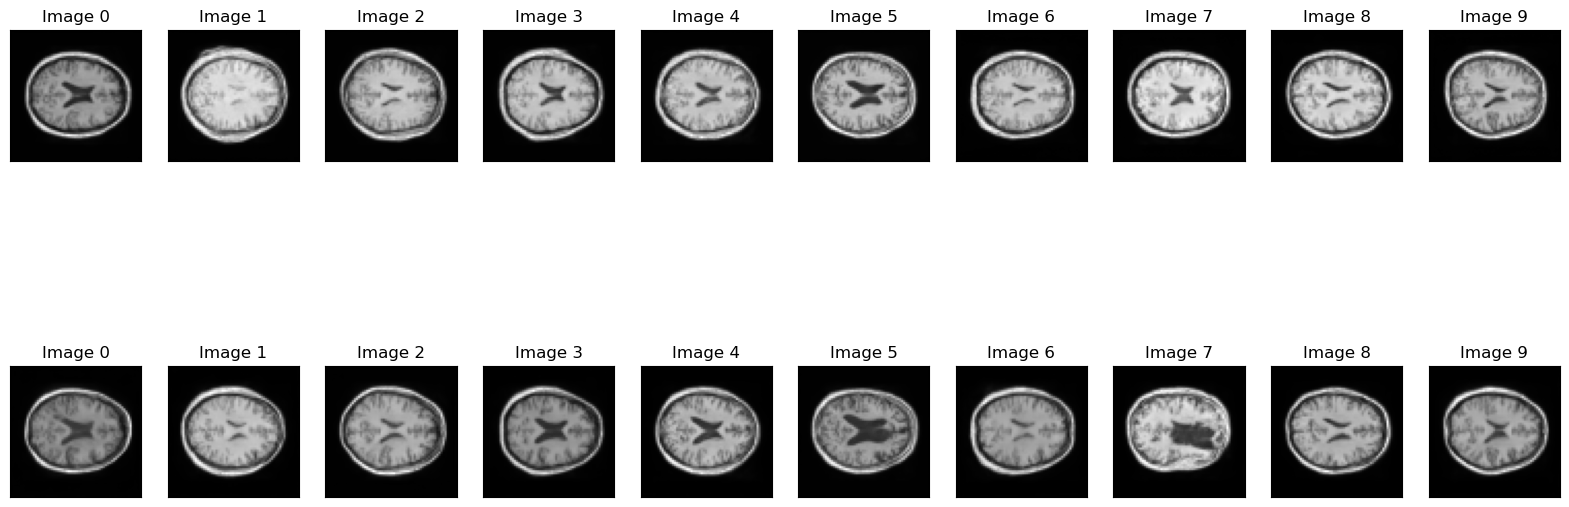

In [8]:
for idx_train_size, train_size in enumerate(train_sizes):

    train_loader_1, train_loader_2 = return_loaders_disjoint(train_size)
    
    ddpm_1 = train_network(train_loader_1, timesteps, image_size, channels, dim_mults)
    ddpm_2 = train_network(train_loader_2, timesteps, image_size, channels, dim_mults)

    # draw noise path
    noises = torch.randn((timesteps+1, batch_size_sampling, channels, image_size, image_size)).to(device)
    
    # sample 10 images from both models
    samples_1 = sample(ddpm_1, image_size=image_size, batch_size=batch_size_sampling, channels=channels, noises=noises)
    samples_2 = sample(ddpm_2, image_size=image_size, batch_size=batch_size_sampling, channels=channels, noises=noises)

    samples_train_sizes[train_size] = (samples_1, samples_2)
    train_loaders[train_size] = (train_loader_1, train_loader_2)
    
    start = 0
    end = -1

    fig, axs = plt.subplots(2, 10, figsize=(20, 8))
    for i in range(10):
        axs[0,i].get_xaxis().set_visible(False)
        axs[0,i].get_yaxis().set_visible(False)
        axs[0,i].set_title(f"Image {i}")
        axs[0,i].imshow(samples_1[-1][i].reshape(image_size, image_size, channels), cmap="gray")
        
        axs[1,i].get_xaxis().set_visible(False)
        axs[1,i].get_yaxis().set_visible(False)
        axs[1,i].set_title(f"Image {i}")
        axs[1,i].imshow(samples_2[-1][i].reshape(image_size, image_size, channels), cmap="gray")

    plt.show()

In [73]:
def nearest_neighbor_train_set(sample, train_set):
    idx_nearest_neighbor = 0
    nearest_neighbor_dist = (sample**2).mean()
    nearest_neighbor = 0
    
    cpt = 0
    for train_set_batch in train_set:
        nearest_neighbor_batch_dist = torch.min(((train_set_batch["T1"].to(torch.float)-sample)**2).mean(-1).mean(-1)[:,0])
        idx_nearest_neighbor_batch = torch.argmin(((train_set_batch["T1"].to(torch.float)-sample)**2).mean(-1).mean(-1)[:,0])
        
        if nearest_neighbor_dist>nearest_neighbor_batch_dist:
            idx_nearest_neighbor = cpt + idx_nearest_neighbor_batch
            nearest_neighbor_dist = nearest_neighbor_batch_dist
            nearest_neighbor = train_set_batch["T1"].to(torch.float)[idx_nearest_neighbor_batch]
        
        cpt += train_set_batch["T1"].shape[0]
        
    return nearest_neighbor[0], idx_nearest_neighbor, nearest_neighbor_dist

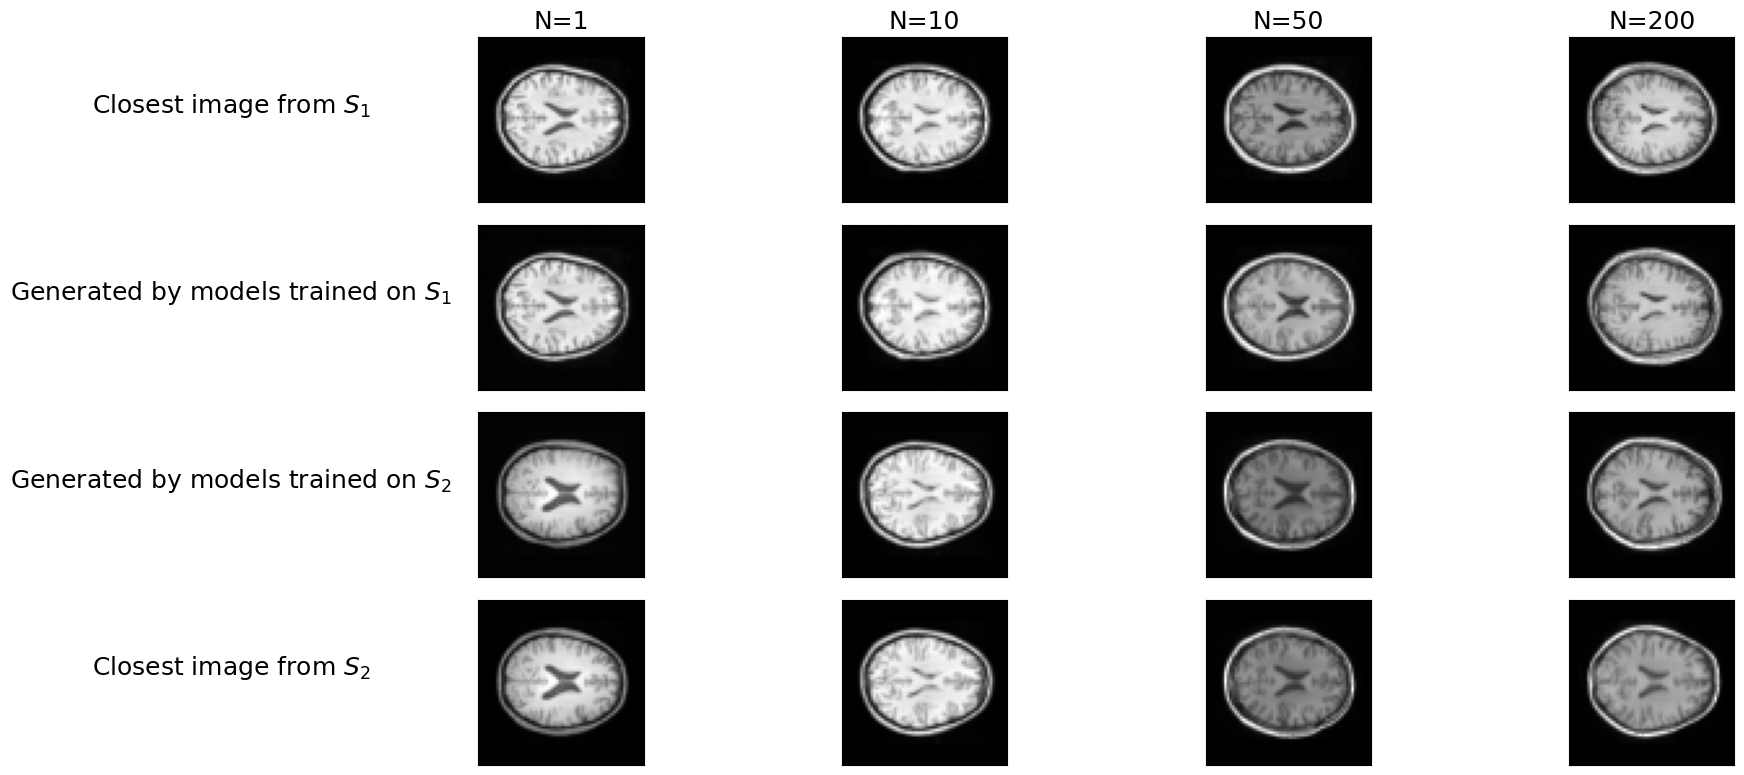

In [110]:
idx_sample = 2

plt.rc('font', size=15)

#samples_train_sizes[train_size] = (samples_1, samples_2)
#train_loaders[train_size] = (train_loader_1, train_loader_2)

fig, axs = plt.subplots(4, len(train_sizes), figsize=(20, 8))
for idx_train_sizes, train_size in enumerate(train_sizes):

    samples_1, samples_2 = samples_train_sizes[train_size]
    
    sample_1_nearest_neighbor, _, _ = nearest_neighbor_train_set(samples_1[-1][idx_sample,0], train_loaders[train_size][0])
    sample_2_nearest_neighbor, _, _ = nearest_neighbor_train_set(samples_2[-1][idx_sample,0], train_loaders[train_size][1])

    axs[0,idx_train_sizes].title.set_text("N="+str(train_size))
    axs[0,idx_train_sizes].tick_params(axis='both', bottom=False, left=False, labelleft=False, top=False, labelbottom=False)
    axs[0,idx_train_sizes].imshow(sample_1_nearest_neighbor, cmap="gray")

    axs[1,idx_train_sizes].tick_params(axis='both', bottom=False, left=False, labelleft=False, top=False, labelbottom=False)
    axs[1,idx_train_sizes].imshow(samples_1[-1][idx_sample,0], cmap="gray")
    
    axs[2,idx_train_sizes].tick_params(axis='both', bottom=False, left=False, labelleft=False, top=False, labelbottom=False)
    axs[2,idx_train_sizes].imshow(samples_2[-1][idx_sample,0], cmap="gray")
    
    #axs[3,idx_train_sizes].get_xaxis().set_visible(False)
    axs[3,idx_train_sizes].tick_params(axis='both', bottom=False, left=False, labelleft=False, top=False, labelbottom=False)
    axs[3,idx_train_sizes].imshow(sample_2_nearest_neighbor, cmap="gray")

rows = ['Closest image from $S_1$', 'Generated by models trained on $S_1$', 'Generated by models trained on $S_2$', 'Closest image from $S_2$']
for ax, row in zip(axs[:,0], rows):
    ax.yaxis.set_label_coords(-1.5,0)
    ax.set_ylabel(row, rotation=0, size='large')
    
fig.tight_layout()

plt.show()

In [21]:
batch_size_sampling = 1

noises = torch.randn((timesteps+1, batch_size_sampling, channels, image_size, image_size)).to(device)

In [22]:
samples = sample(ddpm, image_size=image_size, batch_size=batch_size_sampling, channels=channels, noises=noises)

1000
ok


sampling loop time step: 100%|███████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.25it/s]


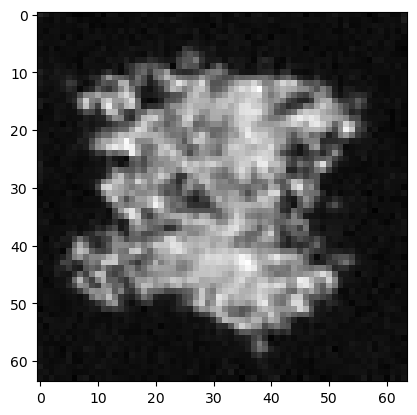

In [23]:
plt.imshow(samples[-1][0].reshape(image_size, image_size, channels), cmap="gray")

plt.show()

In [74]:
sample_nearest_neighbor, _, _ = nearest_neighbor_train_set(samples_1[-1][0,idx_sample], train_loaders[train_size][0])

sample_nearest_neighbor

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])